# Perceptron



In [812]:
import numpy as np
import matplotlib.pyplot as plt

* x1 e x2: dados de entrada.
* w1 e w2: pesos que serão multiplicados pelos dados de entrada.
* b: bias, também é um peso, porém é chamado de “peso livre” por não ser multiplicado com nenhuma outra variável.
* z: soma das multiplicações e adição do bias e posteriormente aplicado a função de ativação, que é responsável pela saída do dado processado.
* função de ativação: função matemática responsável por produzir o dado binário de saída. Normalmente na função de ativação é utilizada a função degrau, onde se a saída da função for maior ou igual a 0, o resultado produzido será 1, se for menor, resultará em 0. Nessa atividade também experimentei a função de ativação sigmoid
* erro: valor esperado subtraído do valor predito pelo modelo.
* taxa de aprendizagem: quantifica o quanto nosso modelo vai atualizar a cada passo de aprendizagem. Chamado de alfa ou lr (learning_rate)

In [ ]:
class Perceptron:

    def __init__(self, input_size):
        # Random small weights
        self.w = np.random.random(input_size)
        self.b = np.random.random()
        
    def step(self, x):
        # Returns 1 if x > 0. Returns 0 otherwise
        return np.heaviside(x, 0)

    def forward(self, inputs, activation="sigmoid"):
        z = np.dot(inputs, self.w.T) + self.b
        
        if activation.lower() == "step":
            z = self.step(z)
        elif activation.lower() == "sigmoid":
            z = self.sigmoid(z)
        else:
            return ValueError

        return z 
    
    def train(self, inputs, outputs, lr, epochs, activation="sigmoid"):
        outputs = outputs.flatten()
        loss_hist = []

        for e in range(1, epochs):
            predictions = self.forward(inputs, activation=activation)
            
            error = outputs - predictions
            loss = self.binary_cross_entropy_loss(outputs, predictions)
            loss_hist.append(loss)

            # Update parameters
            self.w += lr * np.dot(inputs.T, error)  # dor product updates all w's
            self.b += lr * np.sum(error)

            if (e % 100) == 1.0:
                print(f"Epoch {e}/{epochs}, Weights: {np.round(self.w, 2)}, Bias: {np.round(self.b, 2)} Loss: {loss}")

        return loss_hist

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def binary_cross_entropy_loss(self, y_true, y_pred):
        # Epsilon to prevent log(0)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        # Formula
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        
        return loss

## Logic gates


[<img src="https://cdn.shopify.com/s/files/1/0611/1644/9018/files/Gate_in_Computer_Science_reference_sheet_e70131cb-748f-488f-9257-6149e56781d1_1024x1024.jpg?v=1681415691">](https://computerengineeringforbabies.com/blogs/engineering/logic-gate)

### AND logic case

In [814]:
percp = Perceptron(2)

In [815]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.float64([[0], [0], [0], [1]])

In [816]:
hist = percp.train(inputs, outputs, 0.1, 1000)

Epoch 1/1000, Weights: [0.19 0.73], Bias: -0.09 Loss: 0.7653313299263915
Epoch 101/1000, Weights: [1.83 1.89], Bias: -3.07 Loss: 0.2481106300390561
Epoch 201/1000, Weights: [2.75 2.77], Bias: -4.37 Loss: 0.1635471696996152
Epoch 301/1000, Weights: [3.39 3.39], Bias: -5.29 Loss: 0.12202463617441474
Epoch 401/1000, Weights: [3.88 3.88], Bias: -6.01 Loss: 0.09705180471502745
Epoch 501/1000, Weights: [4.27 4.27], Bias: -6.6 Loss: 0.08037718062900823
Epoch 601/1000, Weights: [4.61 4.61], Bias: -7.1 Loss: 0.06847580262323656
Epoch 701/1000, Weights: [4.9 4.9], Bias: -7.53 Loss: 0.0595712778798694
Epoch 801/1000, Weights: [5.15 5.15], Bias: -7.91 Loss: 0.05266891385281068
Epoch 901/1000, Weights: [5.38 5.38], Bias: -8.25 Loss: 0.047168441758972196


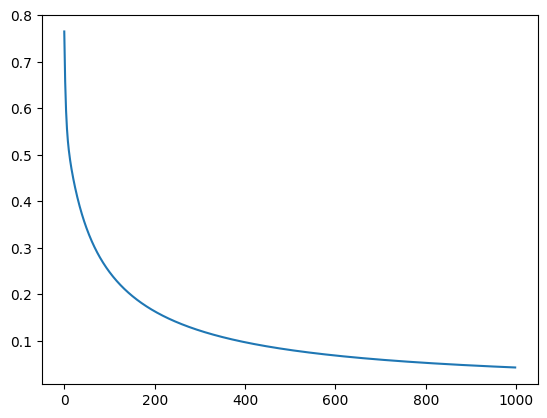

In [817]:
plt.plot(hist)

In [818]:
pred_1 = percp.forward([0, 0])
pred_2 = percp.forward([0, 1])
pred_3 = percp.forward([1, 0])
pred_4 = percp.forward([1, 1])

print("Predictions:")
print(pred_1)
print(pred_2)
print(pred_3)
print(pred_4)

Predictions:
0.00019249538750423694
0.0487327164476162
0.048731397676437506
0.9316508152574647


## OR logic case

In [819]:
percp = Perceptron(2)

In [820]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.float64([[0], [1], [1], [1]])

In [821]:
# Passamos os dados de entrada e de saída, junto com a taxa de aprendizagem e a quantidade de épocas de treinamento
hist = percp.train(inputs, outputs, 0.1, 1000)

Epoch 1/1000, Weights: [0.74 0.27], Bias: 0.8 Loss: 0.45976479123956626
Epoch 101/1000, Weights: [2.6  2.48], Bias: -0.61 Loss: 0.18047944561199486
Epoch 201/1000, Weights: [3.66 3.61], Bias: -1.26 Loss: 0.10806365579175353
Epoch 301/1000, Weights: [4.39 4.36], Bias: -1.66 Loss: 0.0759737840388418
Epoch 401/1000, Weights: [4.94 4.92], Bias: -1.96 Loss: 0.05816879943909232
Epoch 501/1000, Weights: [5.38 5.37], Bias: -2.19 Loss: 0.046950894547628345
Epoch 601/1000, Weights: [5.74 5.74], Bias: -2.38 Loss: 0.03927584206273234
Epoch 701/1000, Weights: [6.06 6.05], Bias: -2.54 Loss: 0.03371215148215191
Epoch 801/1000, Weights: [6.33 6.32], Bias: -2.68 Loss: 0.029502784002884044
Epoch 901/1000, Weights: [6.57 6.57], Bias: -2.8 Loss: 0.026211619293256473


In [822]:
pred_1 = percp.forward([0, 0])
pred_2 = percp.forward([0, 1])
pred_3 = percp.forward([1, 0])
pred_4 = percp.forward([1, 1])

print("Predictions:")
print(pred_1)
print(pred_2)
print(pred_3)
print(pred_4)

Predictions:
0.05151984667118256
0.9794597117156709
0.9795081347525739
0.9999761697078537


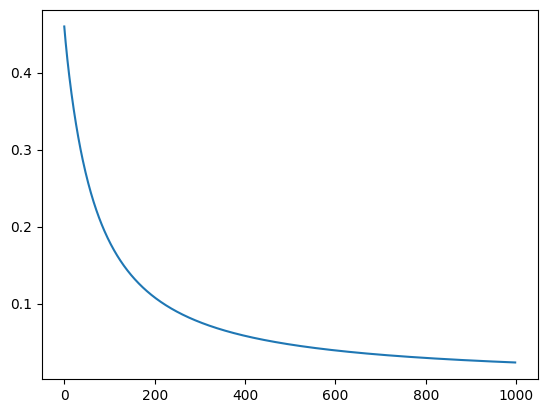

In [823]:
plt.plot(hist)

## XOR logic case

In [824]:
percp = Perceptron(2)

In [825]:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.float64([[1], [0], [0], [1]])

In [826]:
hist = percp.train(inputs, outputs, 0.1, 1000)

Epoch 1/1000, Weights: [0.9  0.15], Bias: 0.36 Loss: 0.8422198838336811
Epoch 101/1000, Weights: [0.07 0.01], Bias: -0.05 Loss: 0.6933095024859859
Epoch 201/1000, Weights: [0.01 0.01], Bias: -0.01 Loss: 0.6931518495563085
Epoch 301/1000, Weights: [0. 0.], Bias: -0.0 Loss: 0.6931473640797134
Epoch 401/1000, Weights: [0. 0.], Bias: -0.0 Loss: 0.6931471882310966
Epoch 501/1000, Weights: [0. 0.], Bias: -0.0 Loss: 0.6931471808837137
Epoch 601/1000, Weights: [0. 0.], Bias: -0.0 Loss: 0.6931471805736302
Epoch 701/1000, Weights: [0. 0.], Bias: -0.0 Loss: 0.6931471805605238
Epoch 801/1000, Weights: [0. 0.], Bias: -0.0 Loss: 0.6931471805599697
Epoch 901/1000, Weights: [0. 0.], Bias: -0.0 Loss: 0.6931471805599463


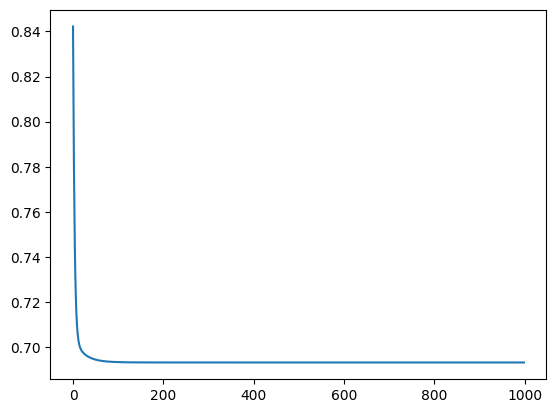

In [827]:
plt.plot(hist)

In [828]:

pred_1 = percp.forward([0, 0])
pred_2 = percp.forward([0, 1])
pred_3 = percp.forward([1, 0])
pred_4 = percp.forward([1, 1])

print("Predictions:")
print(pred_1)
print(pred_2)
print(pred_3)
print(pred_4)


Predictions:
0.4999999922944718
0.49999999878975543
0.4999999987917926
0.5000000052870762
